In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\Diego\Downloads\DIA_Form.csv")
data.columns = ['Date', 'Age', 'Sex', 'AW', 'WS0', 'WS10', 'WS20', 'WS50']


In [30]:
print(data.head())

                  Date  Age      Sex  AW WS0 WS10 WS20 WS50
0  26/03/2021 21.50.20   23  Maschio  Sì  No   Sì  NaN  NaN
1  26/03/2021 21.50.46   23  Femmina  No  No   No   No   No
2  26/03/2021 21.50.50   23  Maschio  Sì  No   No   Sì  NaN
3  26/03/2021 21.50.58   23  Femmina  Sì  No   No   No   Sì
4  26/03/2021 21.55.34   24  Femmina  No  No   Sì  NaN  NaN


In [31]:
# Total number of people
N = len(data.Date)
N

987

CLASSES

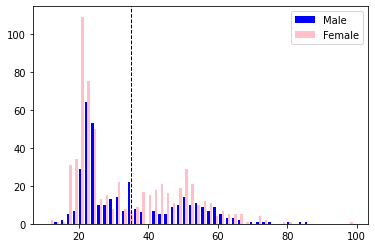

In [32]:
AgeM = data.Age[data.Sex == 'Maschio']
AgeF = data.Age[data.Sex == 'Femmina']

bins = 50
plt.hist([AgeM, AgeF], bins, label=['Male', 'Female'], color=['Blue', 'Pink'])
plt.legend(loc='upper right')
plt.axvline(35, color='k', linestyle='dashed', linewidth=1)
plt.show()

In [33]:
# Classes
c1 = data[(data.Sex == 'Femmina') & (data.Age <= 35)]
c2 = data[(data.Sex == 'Maschio') & (data.Age <= 35)]
c3 = data[(data.Sex == 'Femmina') & (data.Age > 35)]
c4 = data[(data.Sex == 'Maschio') & (data.Age > 35)]

In [34]:
# Total number of people
N1 = len(c1.Date)
N1

N2 = len(c2.Date)
N2

N3 = len(c3.Date)
N3

N4 = len(c4.Date)
N4

130

In [35]:
# Number of people of class c1 that buy item 1
nc1_i1 = c1.Date[c1.AW == 'Sì'].count()
nc1_i1
nc2_i1 = c2.Date[c2.AW == 'Sì'].count()
nc2_i1
nc3_i1 = c3.Date[c3.AW == 'Sì'].count()
nc3_i1
nc4_i1 = c4.Date[c4.AW == 'Sì'].count()
nc4_i1


# P(buy item 1) = i1
c1_i1 = nc1_i1 / N1
c1_i1
c2_i1 = nc2_i1 / N2
c2_i1
c3_i1 = nc3_i1 / N3
c3_i1
c4_i1 = nc4_i1 / N4
c4_i1



# Number of people that buy item 2 (or buy item 2 + P0)
nc1_i2_p0 = c1.Date[c1.WS0 == 'Sì'].count()
nc1_i2_p0
nc2_i2_p0 = c2.Date[c2.WS0 == 'Sì'].count()
nc2_i2_p0
nc3_i2_p0 = c3.Date[c3.WS0 == 'Sì'].count()
nc3_i2_p0
nc4_i2_p0 = c4.Date[c4.WS0 == 'Sì'].count()
nc4_i2_p0

# P(buy item 2 + P0) = P(buy item 2) = i2_p0
c1_i2_p0 = (nc1_i2_p0) / N1
c1_i2_p0
c2_i2_p0 = (nc2_i2_p0) / N2
c2_i2_p0
c3_i2_p0 = (nc3_i2_p0) / N3
c3_i2_p0
c4_i2_p0 = (nc4_i2_p0) / N4
c4_i2_p0


0.16923076923076924

In [36]:
# Number of people that buy item 2 + P1
nc1_i2_p1 = c1.Date[c1.WS10 == 'Sì'].count()
nc1_i2_p1
nc2_i2_p1 = c2.Date[c2.WS10 == 'Sì'].count()
nc2_i2_p1
nc3_i2_p1 = c3.Date[c3.WS10 == 'Sì'].count()
nc3_i2_p1
nc4_i2_p1 = c4.Date[c4.WS10 == 'Sì'].count()
nc4_i2_p1


# P(buy item 2 + P1) = i2_p1
c1_i2_p1 = (nc1_i2_p1 + nc1_i2_p0 ) / N1
c1_i2_p1
c2_i2_p1 = (nc2_i2_p1 + nc2_i2_p0) / N2
c2_i2_p1
c3_i2_p1 = (nc3_i2_p1 + nc3_i2_p0) / N3
c3_i2_p1
c4_i2_p1 = (nc4_i2_p1 + nc4_i2_p0) / N4
c4_i2_p1

0.19230769230769232

In [37]:
# Number of people that buy item 2 + P2
nc1_i2_p2 = c1.Date[c1.WS20 == 'Sì'].count()
nc1_i2_p2
nc2_i2_p2 = c2.Date[c2.WS20 == 'Sì'].count()
nc2_i2_p2
nc3_i2_p2 = c3.Date[c3.WS20 == 'Sì'].count()
nc3_i2_p2
nc4_i2_p2 = c4.Date[c4.WS20 == 'Sì'].count()
nc4_i2_p2

# P(buy item 2 + P2) = i2_p2
c1_i2_p2 = (nc1_i2_p2 + nc1_i2_p1 + nc1_i2_p0) / N1
c1_i2_p2
c2_i2_p2 = (nc2_i2_p2 + nc2_i2_p1 + nc2_i2_p0) / N2
c2_i2_p2
c3_i2_p2 = (nc3_i2_p2 + nc3_i2_p1 + nc3_i2_p0) / N3
c3_i2_p2
c4_i2_p2 = (nc4_i2_p2 + nc4_i2_p1 + nc4_i2_p0) / N4
c4_i2_p2


0.2153846153846154

In [38]:
# Number of people that buy item 2 + P3
nc1_i2_p3 = c1.Date[c1.WS50 == 'Sì'].count()
nc1_i2_p3
nc2_i2_p3 = c2.Date[c2.WS50 == 'Sì'].count()
nc2_i2_p3
nc3_i2_p3 = c3.Date[c3.WS50 == 'Sì'].count()
nc3_i2_p3
nc4_i2_p3 = c4.Date[c4.WS50 == 'Sì'].count()
nc4_i2_p3

# P(buy item 2 + P3) = i2_p3
c1_i2_p3 = (nc1_i2_p3 + nc1_i2_p2 + nc1_i2_p1 + nc1_i2_p0) / N1
c1_i2_p3
c2_i2_p3 = (nc2_i2_p3 + nc2_i2_p2 + nc2_i2_p1 + nc2_i2_p0) / N2
c2_i2_p3
c3_i2_p3 = (nc3_i2_p3 + nc3_i2_p2 + nc3_i2_p1 + nc3_i2_p0) / N3
c3_i2_p3
c4_i2_p3 = (nc4_i2_p3 + nc4_i2_p2 + nc4_i2_p1 + nc4_i2_p0) / N4
c4_i2_p3


0.43846153846153846

MATRICES

In [39]:
# CONSIDERING ALL CUSTOMERS, ALSO WHO DON'T BUY ITEM 1

PALL = np.array([[c1_i2_p0, c2_i2_p0, c3_i2_p0, c4_i2_p0],
              [c1_i2_p1, c2_i2_p1, c3_i2_p1, c4_i2_p1],
              [c1_i2_p2, c2_i2_p2, c3_i2_p2, c4_i2_p2],
              [c1_i2_p3, c2_i2_p3, c3_i2_p3, c4_i2_p3]])
PALL

array([[0.34933333, 0.21097046, 0.24897959, 0.16923077],
       [0.4       , 0.25316456, 0.29387755, 0.19230769],
       [0.44533333, 0.28270042, 0.32244898, 0.21538462],
       [0.76266667, 0.60337553, 0.60816327, 0.43846154]])

In [40]:
# CONSIDERING ALL CUSTOMERS, ALSO WHO DON'T BUY ITEM 1

nPALL = np.array([[nc1_i2_p0, nc2_i2_p0, nc3_i2_p0, nc4_i2_p0],
              [nc1_i2_p1, nc2_i2_p1, nc3_i2_p1, nc4_i2_p1],
              [nc1_i2_p2, nc2_i2_p2, nc3_i2_p2, nc4_i2_p2],
              [nc1_i2_p3, nc2_i2_p3, nc3_i2_p3, nc4_i2_p3]])
nPALL

# To check that che sum are correct
#np.sum(nPALL) + data.Date[data.WS50 == "No"].count() == data.Date.count()


array([[131,  50,  61,  22],
       [ 19,  10,  11,   3],
       [ 17,   7,   7,   3],
       [119,  76,  70,  29]])

In [41]:
# Array c = number of customers [c1, c2, c3, c4]

c = np.array([N1, N2, N3, N4])
c


array([375, 237, 245, 130])